In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv("airfrance_tripadvisor_reviews.csv")
column = df.columns
column

Index(['rating', 'title', 'text', 'publishedDate'], dtype='object')

In [105]:
missing_values=df.isnull().sum()
print (missing_values)

rating           5
title            0
text             0
publishedDate    0
dtype: int64


In [107]:
df.fillna({'rating': df['rating'].mean()}, inplace=True)

In [109]:
missing_values=df.isnull().sum()
print (missing_values)

rating           0
title            0
text             0
publishedDate    0
dtype: int64


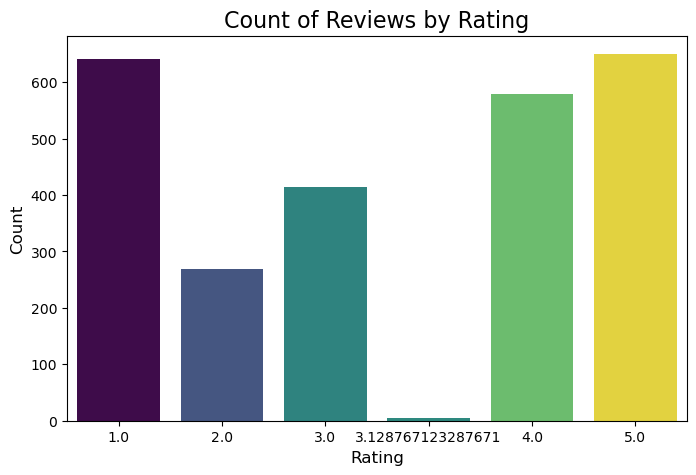

In [111]:
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', hue='rating', data=df, palette='viridis', legend=False)  # Assign 'rating' to hue and disable legend
plt.title('Count of Reviews by Rating', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [113]:
!pip install wordcloud


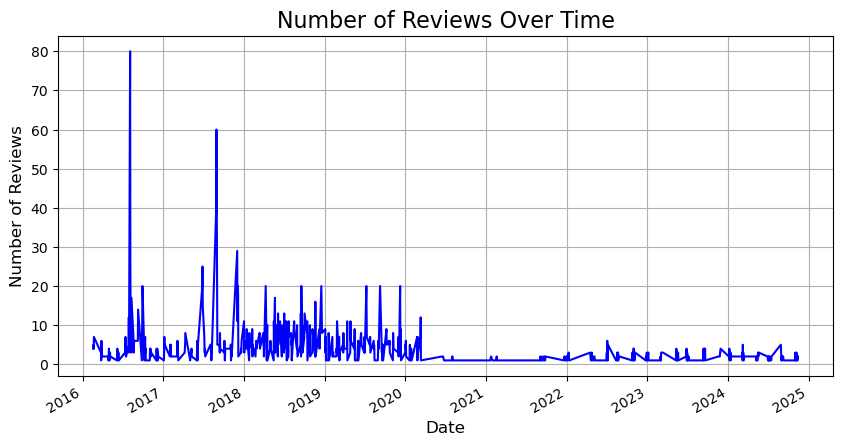

In [114]:
df['publishedDate'] = pd.to_datetime(df['publishedDate'])

# Group by date and count reviews
reviews_per_day = df.groupby('publishedDate').size()

# Line chart for number of reviews over time
plt.figure(figsize=(10, 5))
reviews_per_day.plot(kind='line', color='blue')
plt.title('Number of Reviews Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(True)
plt.show()

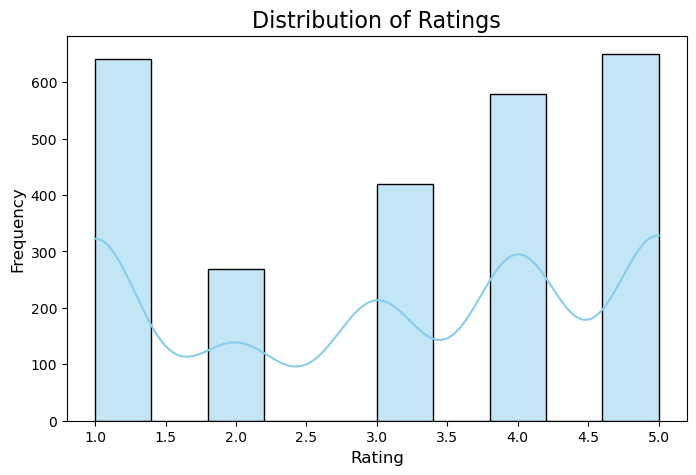

In [115]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')  # Removed 'palette' since it's not needed for color
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error: 2.0960453496327065
R-squared: 0.1013359748675261


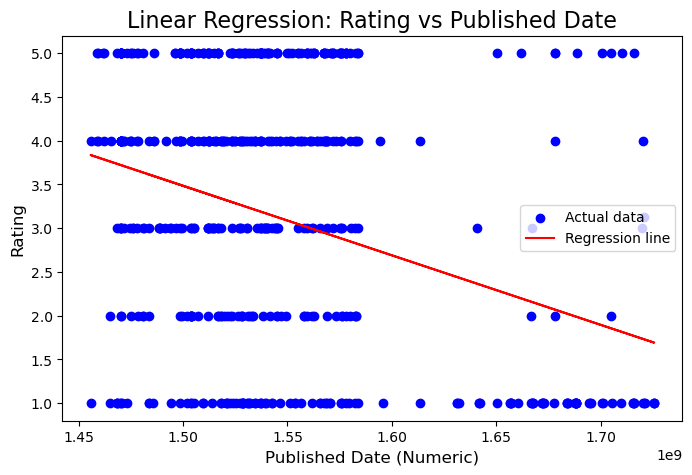

In [121]:
df['publishedDate'] = pd.to_datetime(df['publishedDate'])

# Convert 'publishedDate' to int64 (timestamp in nanoseconds) and then divide by 10^9 to convert to seconds
df['publishedDate'] = df['publishedDate'].astype('int64') / 10**9  # Convert to seconds since epoch

# Select features and target variable
X = df[['publishedDate']]  # Features (independent variable)
y = df['rating']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the regression line
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.title('Linear Regression: Rating vs Published Date', fontsize=16)
plt.xlabel('Published Date (Numeric)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.legend()
plt.show()

Mean Squared Error: 2.98302474261278e-31
R-squared: 1.0


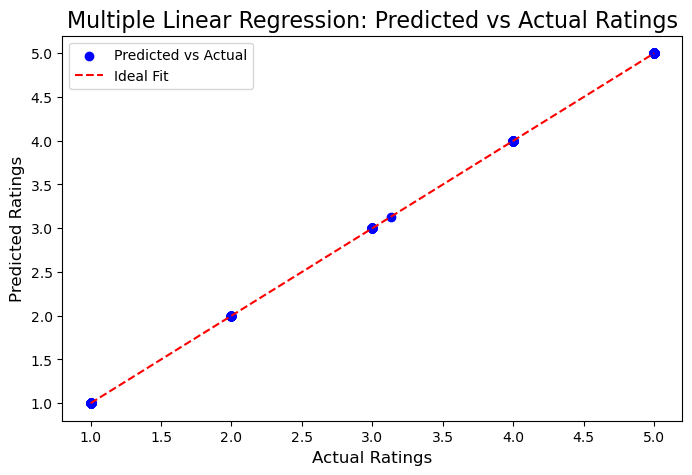

In [123]:
df['publishedDate'] = pd.to_datetime(df['publishedDate'])

# Convert 'publishedDate' to int64 (timestamp in nanoseconds) and then divide by 10^9 to convert to seconds
df['publishedDate'] = df['publishedDate'].astype('int64') / 10**9  # Convert to seconds since epoch

# Select multiple features and target variable
# For example, using 'publishedDate' and 'rating' as features, but you can replace/add more features
X = df[['publishedDate', 'rating']]  # Multiple features (independent variables)
y = df['rating']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the regression line
# Since there are multiple features, we can't directly plot it, but we can visualize residuals
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Multiple Linear Regression: Predicted vs Actual Ratings', fontsize=16)
plt.xlabel('Actual Ratings', fontsize=12)
plt.ylabel('Predicted Ratings', fontsize=12)
plt.legend()
plt.show()

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer

Mean Squared Error: 1.2012303038095031
R2 Score: 0.48498134349921596


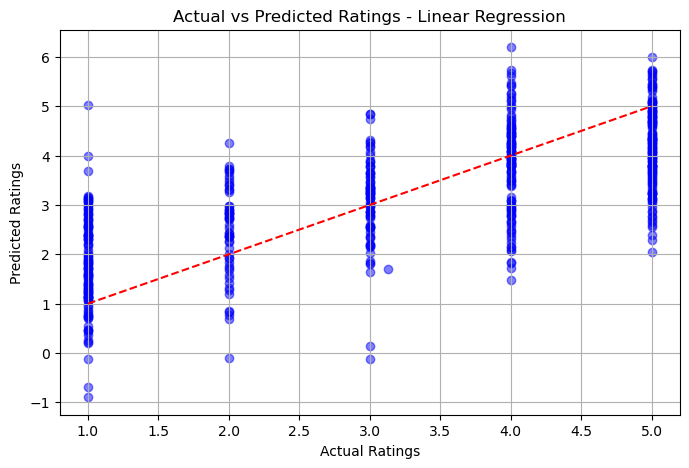

In [129]:
df['publishedDate'] = pd.to_datetime(df['publishedDate'])

# Convert 'publishedDate' to int64 (timestamp in nanoseconds) and then divide by 10^9 to convert to seconds
df['date_feature'] = df['publishedDate'].astype('int64') / 10**9  # Convert to seconds since epoch

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=500)
text_features = tfidf.fit_transform(df['text']).toarray()

# Combine features (text + date)
X = np.hstack([text_features, df[['date_feature']].values])
y = df['rating']  # We are predicting the rating

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plot the actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Ratings - Linear Regression')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.grid(True)
plt.show()

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

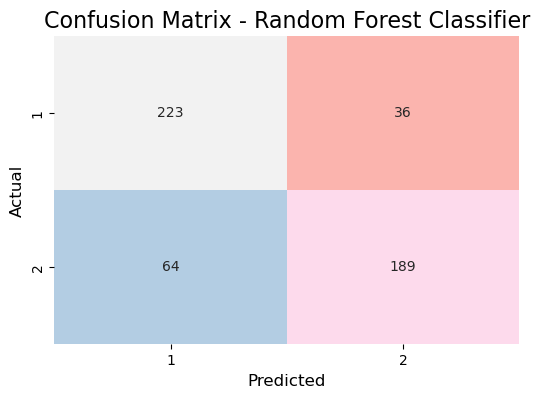

In [133]:
df['publishedDate'] = pd.to_datetime(df['publishedDate'])

# Convert 'publishedDate' to int64 (timestamp in nanoseconds) and then divide by 10^9 to convert to seconds
df['date_feature'] = df['publishedDate'].astype('int64') / 10**9  # Convert to seconds since epoch

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=500)
text_features = tfidf.fit_transform(df['text']).toarray()

# Convert the ratings to categorical classes (for example, treating ratings 1 and 2 as low, and 3 as high)
df['rating_class'] = pd.cut(df['rating'], bins=[0, 3, 5], labels=[1, 2])

# Combine features (text + date)
X = np.hstack([text_features, df[['date_feature']].values])
y = df['rating_class']  # We are predicting the rating class (1 or 2)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', xticklabels=[1, 2], yticklabels=[1, 2], cbar=False)

# Add labels and title
plt.title("Confusion Matrix - Random Forest Classifier", fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

# Show the plot
plt.show()